In [59]:
!pip install nbformat

     ---------------------------------------- 78.5/78.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 88.5/88.5 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 63.8/63.8 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 234.7/234.7 kB 4.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
!pip install seaborn

     -------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
!pip install oracledb



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\testa\AppData\Local\Temp\ipykernel_64732\1597967084.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


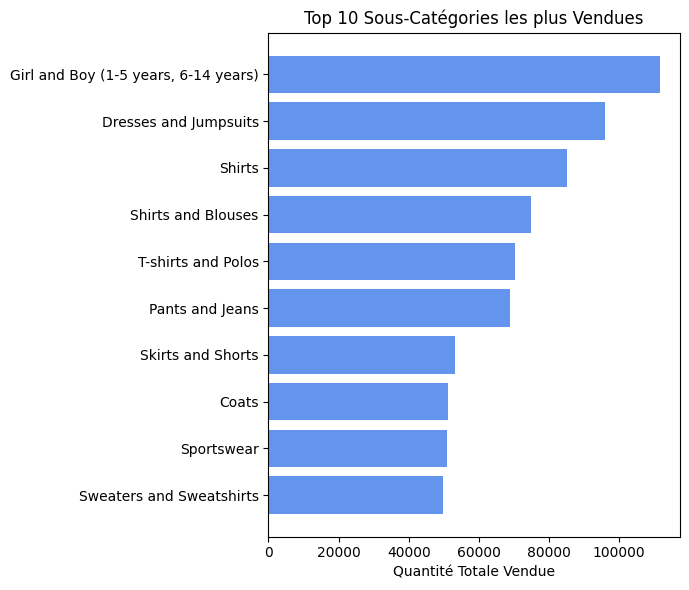

In [55]:
import oracledb
import pandas as pd
import matplotlib.pyplot as plt

# Connexion
dsn = oracledb.makedsn("localhost", 1521, service_name="ORCLPDB")
conn = oracledb.connect(user="admin27", password="ADMIN", dsn=dsn)

# Requête SQL
query = """
SELECT p.Sub_Category , SUM(f.Quantity) AS Total_Quantite
FROM Fait_Transaction f
JOIN Dim_Product p ON f.Product_ID = p.Product_ID
GROUP BY p.Sub_Category
ORDER BY Total_Quantite DESC
FETCH FIRST 10 ROWS ONLY
"""

# Lire dans un DataFrame
df = pd.read_sql(query, conn)
conn.close()

# Affichage du graphique
plt.figure(figsize=(7, 6))
plt.barh(df["SUB_CATEGORY"], df["TOTAL_QUANTITE"], color="cornflowerblue")
plt.xlabel("Quantité Totale Vendue")
plt.title("Top 10 Sous-Catégories les plus Vendues")
plt.gca().invert_yaxis()  # Pour avoir le plus grand en haut
plt.tight_layout()
plt.show()


C:\Users\testa\AppData\Local\Temp\ipykernel_64732\582904784.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\testa\AppData\Local\Temp\ipykernel_64732\582904784.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["BOUTIQUE"] = df_clean["BOUTIQUE"].str.encode("latin1").str.decode("utf-8", errors="ignore")  # correction encodage


<Figure size 1400x700 with 0 Axes>

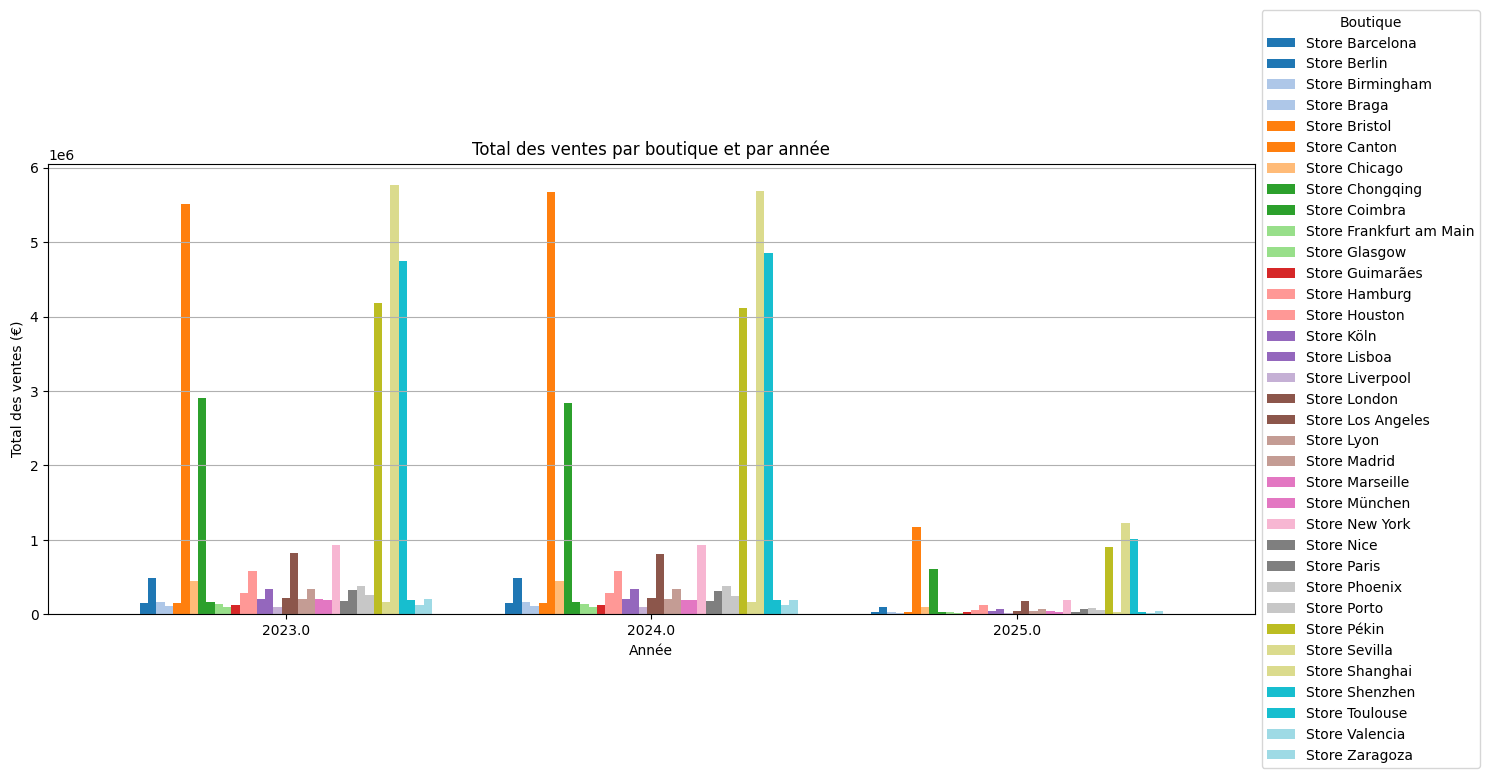

In [ ]:
import oracledb
import pandas as pd
import matplotlib.pyplot as plt

# Connexion
dsn = oracledb.makedsn("localhost", 1521, service_name="ORCLPDB")
conn = oracledb.connect(user="admin27", password="ADMIN", dsn=dsn)

# Requête
query = """
SELECT 
    S.Name AS Boutique,
    D.Year AS Annee,
    SUM(F.Line_Total) AS Total_Ventes
FROM 
    Fait_Transaction F
JOIN 
    Dim_Store S ON F.Store_ID = S.Store_ID
JOIN 
    Dim_Date D ON F.Date_ID = D.Date_ID
WHERE 
    F.Transaction_Type = 'Sale'
GROUP BY 
    ROLLUP(S.Name, D.Year)
"""

# Chargement
df = pd.read_sql(query, conn)
conn.close()

# Nettoyage
df_clean = df.dropna(subset=["BOUTIQUE", "ANNEE"])
df_clean["BOUTIQUE"] = df_clean["BOUTIQUE"].str.encode("latin1").str.decode("utf-8", errors="ignore")  # correction encodage

# Pivot table
pivot_df = df_clean.pivot(index="ANNEE", columns="BOUTIQUE", values="TOTAL_VENTES")

# Graphique
plt.figure(figsize=(14, 7))
pivot_df.plot(kind="bar", stacked=False, width=0.8, colormap="tab20", figsize=(15, 7))

plt.ylabel("Total des ventes (€)")
plt.xlabel("Année")
plt.title("Total des ventes par boutique et par année")
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Boutique")
plt.tight_layout()
plt.grid(axis='y')
plt.show()


C:\Users\testa\AppData\Local\Temp\ipykernel_64732\2945367764.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


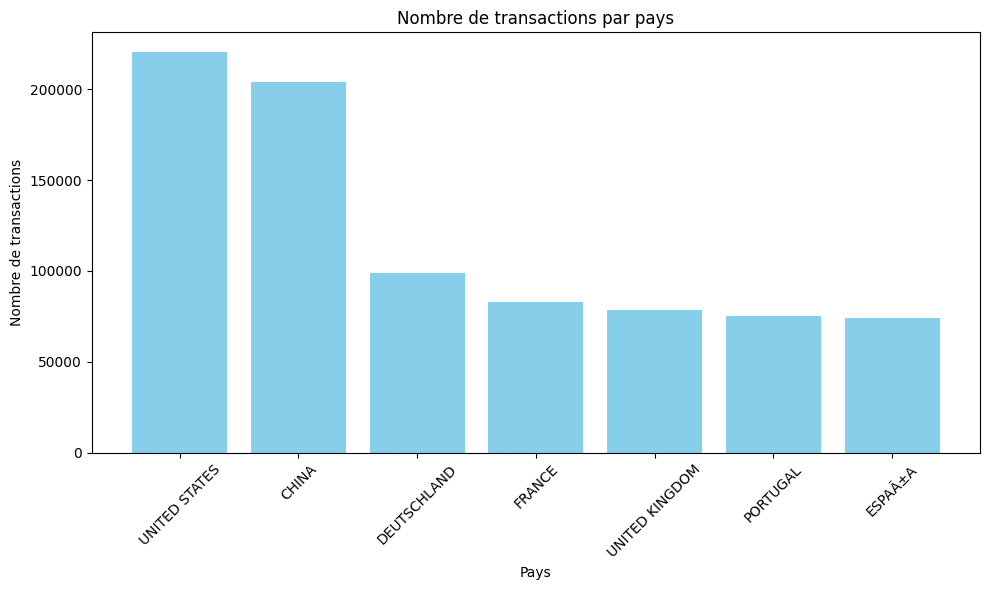

In [51]:
import oracledb
import pandas as pd
import matplotlib.pyplot as plt

# Connexion Oracle
dsn = oracledb.makedsn("localhost", 1521, service_name="ORCLPDB")
conn = oracledb.connect(user="admin27", password="ADMIN", dsn=dsn)

# Requête SQL corrigée avec la jointure Dim_Store
query = """
SELECT
  s.Country AS Pays,
  COUNT(*) AS Nombre_Transactions
FROM
  Fait_Transaction f
JOIN
  Dim_Store s ON f.Store_ID = s.Store_ID
GROUP BY
  s.Country
ORDER BY
  Nombre_Transactions DESC
"""

# Charger les résultats dans un DataFrame
df = pd.read_sql(query, conn)
conn.close()

# Affichage graphique
plt.figure(figsize=(10, 6))
plt.bar(df["PAYS"], df["NOMBRE_TRANSACTIONS"], color="skyblue")
plt.title("Nombre de transactions par pays")
plt.xlabel("Pays")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [63]:
import oracledb
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Connexion Oracle
dsn = oracledb.makedsn("localhost", 1521, service_name="ORCLPDB")
conn = oracledb.connect(user="admin27", password="ADMIN", dsn=dsn)

# Requête
query = """
SELECT 
    s.Country,
    s.City,
    p.Category,
    SUM(f.Quantity) AS Total_Quantite,
    SUM(f.Line_Total) AS Chiffre_affaires
FROM Fait_Transaction f
JOIN Dim_Store s ON f.Store_ID = s.Store_ID
JOIN Dim_Product p ON f.Product_ID = p.Product_ID
WHERE s.Country IS NOT NULL
GROUP BY ROLLUP(s.Country, s.City, p.Category)
ORDER BY 1,2,3
"""
df = pd.read_sql(query, conn)
conn.close()
def clean_rollup_data(df):
    df = df.copy()
    df['Niveau'] = 'Détail'
    df.loc[df['CATEGORY'].isna(), 'Niveau'] = 'Ville'
    df.loc[df['CITY'].isna(), 'Niveau'] = 'Pays'
    df.loc[df['COUNTRY'].isna(), 'Niveau'] = 'Global'
    return df.fillna({
        'COUNTRY': 'TOTAL GLOBAL',
        'CITY': 'TOTAL PAYS',
        'CATEGORY': 'TOTAL VILLE'
    })

df_clean = clean_rollup_data(df)
fig = px.treemap(
    df_clean[df_clean["COUNTRY"] != "TOTAL GLOBAL"],
    path=['COUNTRY', 'CITY', 'CATEGORY'],
    values='CHIFFRE_AFFAIRES',
    color='TOTAL_QUANTITE',
    color_continuous_scale='Blues',
    title="Treemap des ventes hiérarchiques"
)
fig.show()


C:\Users\testa\AppData\Local\Temp\ipykernel_64732\2836140810.py:26: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

